<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Kai/quickhull_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def runProgram():
  num_points = 10

  points = np.random.rand(num_points,2)*10

  sort = sorted(points, key=lambda x: x[0])

  left = sort[0]
  right = sort[-1]

  hull_set = np.ndarray((2,), dtype=float)
  hull_set = hull_set + [left, right]

  sort.pop(0)
  sort.pop(-1)

  parseSides = lambda l, r, ps: (
    np.array([p for p in ps if aboveLine(l, r, p)]),
    np.array([p for p in ps if not aboveLine(l, r, p)])
  )

  upper_set, lower_set = parseSides(left, right, sort)

  hull_set += quickHull(upper_set,left,right,1)
  hull_set += quickHull(lower_set,left,right,-1)

  plt.scatter(points[:,0],points[:,1])
  plt.scatter(hull_set[:,0],hull_set[:,1],color='red')

  return hull_set

In [ ]:
def aboveLine(a,b,c):
  return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0]) > 0

In [ ]:
def furthestP(points,a,b):
  dist = 1/2 * np.abs(a[0]*(b[1] - points[:,1]) + b[0]*(points[:,1] - a[1]) + points[:,0]*(a[1] - b[1]))
  return points[np.argmax(dist)]

In [102]:
def quickHull(points,a,b,f):
  if points.size <= 2:
    return 0

  c = furthestP(points,a,b)

  hull_set = np.array([c])

  indices = np.where((points == c).all(axis=1))[0]
  points = np.delete(points, indices, axis=0)

  parseSides = lambda l, r, ps: (
    np.array([p for p in ps if aboveLine(l, r, p)]),
    np.array([p for p in ps if not aboveLine(l, r, p)])
  )

  set_1a, set_1b = parseSides(a,c,points)
  set_2a, set_2b = parseSides(b,c,points)

  if f == 1:
      hull_set = hull_set + quickHull(set_1a, a, c, 1)
      hull_set = hull_set + quickHull(set_2a, c, b, 1)

  else:
      hull_set = hull_set + quickHull(set_1b, a, c, -1)
      hull_set = hull_set + quickHull(set_2b, c, b, -1)

  return hull_set

array([[inf, inf],
       [inf, inf]])

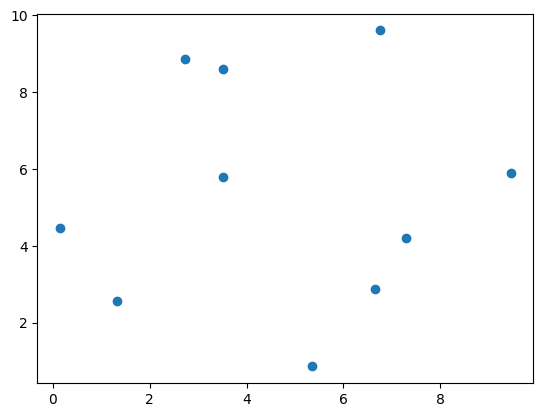

In [107]:
runProgram()